In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_context("talk")

## Constraint

In [2]:
df = pd.read_csv("../outputs/expected_variants_all_regions_no_cpg_stats.tsv", sep="\t")

### Z scores per transcript

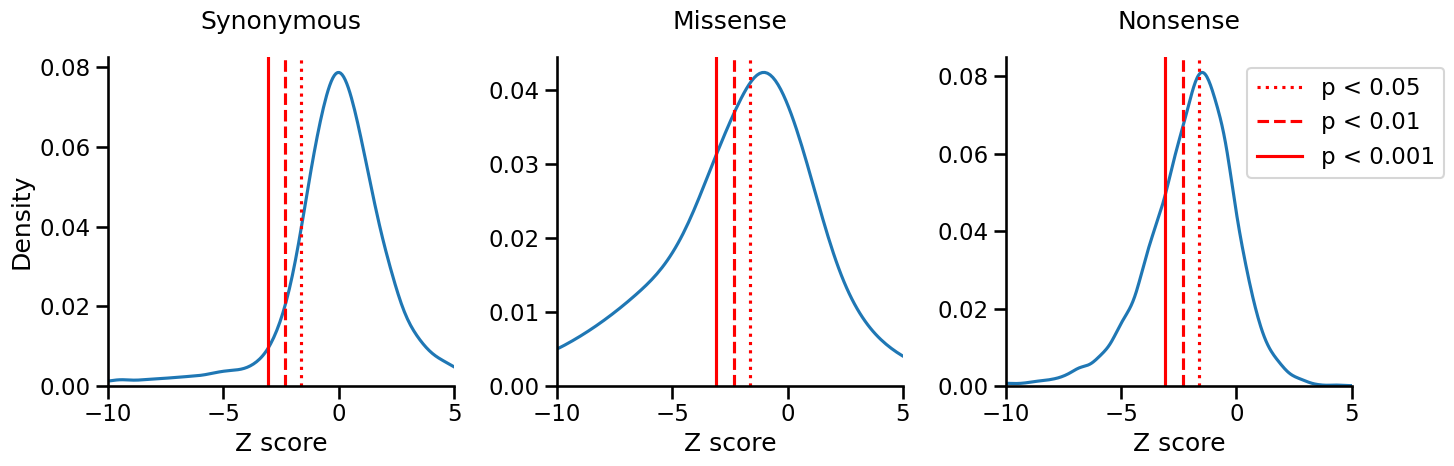

In [3]:
csq = ["synonymous", "missense", "nonsense"]

g = sns.displot(
    kind="kde",
    data=df[df.region == "transcript"],
    x="z",
    col="csq",
    col_order=csq,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-10, 5),
)

for ax, c in zip(g.axes[0], [c.capitalize() for c in csq]):
    ax.set_title(c, pad=20)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.8))
plt.tight_layout()

plt.savefig("../plots/constraint_z_in_transcripts_by_csq.svg", format="svg")

### O/E per transcript

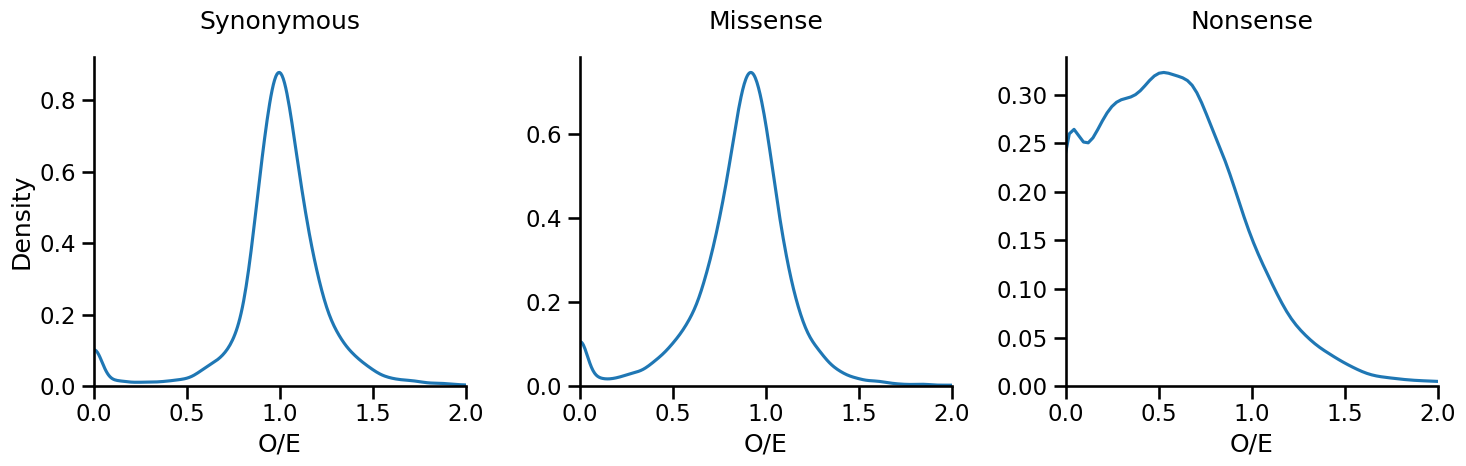

In [4]:
csq = ["synonymous", "missense", "nonsense"]

g = sns.displot(
    kind="kde",
    data=df[df.region == "transcript"],
    x=df["n_obs"] / df["n_exp"],
    col="csq",
    col_order=csq,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="O/E",
    xlim=(0, 2),
)

for ax, c in zip(g.axes[0], [c.capitalize() for c in csq]):
    ax.set_title(c, pad=20)

plt.tight_layout()
plt.savefig("../plots/constraint_oe_in_transcripts_by_csq.svg", format="svg")

### Nonsense Z score by region

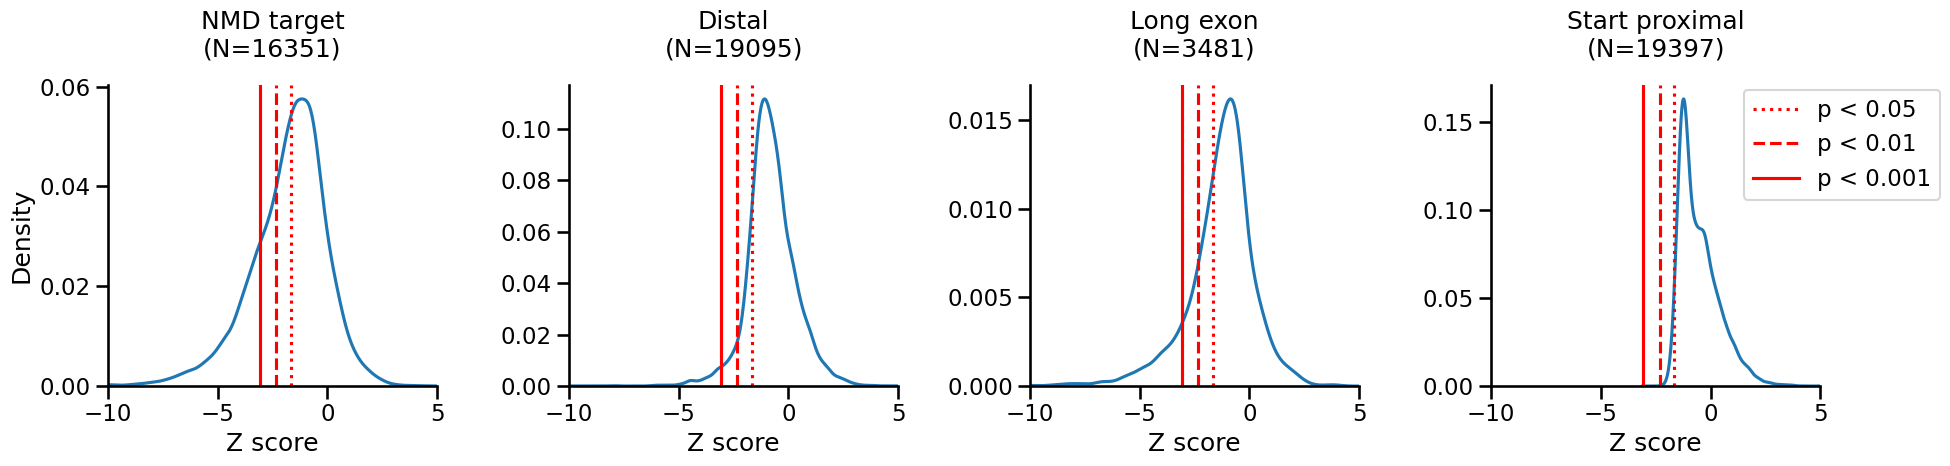

In [5]:
regions = ["nmd_target", "distal_nmd", "long_exon", "start_proximal"]
regions_title = ["NMD target", "Distal", "Long exon", "Start proximal"]
count = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "z"].count() for r in regions
]

g = sns.displot(
    kind="kde",
    data=df[df.csq == "nonsense"],
    x="z",
    col="region",
    col_order=regions,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-10, 5),
)

for ax, r, n in zip(g.axes[0], [r for r in regions_title], count):
    ax.set_title(f"{r}\n(N={n})", pad=20)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")

plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.8))
plt.tight_layout()
plt.savefig("../plots/constraint_z_in_regions_nonsense.svg", format="svg")